In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output,display

In [2]:
# importing the train and test datasets

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_sub=pd.read_csv("sample_submission.csv")

In [3]:
train.head(10)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
5,6,6,1,Development,Course,0,0,1,10395,0.007,62
6,7,7,1,Development,Course,1,0,1,16023,0.007,122
7,8,8,1,Development,Course,1,0,1,14385,0.007,114
8,9,9,1,Development,Course,1,0,1,16485,0.007,121
9,10,10,1,Development,Course,1,0,1,13377,0.007,100


In [4]:
train.tail(10)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
512077,548018,873,600,Software Marketing,Program,0,0,1,11739,0.07,144
512078,548019,874,600,Software Marketing,Program,0,0,1,10311,0.07,133
512079,548020,875,600,Software Marketing,Program,0,1,1,9429,0.07,114
512080,548021,876,600,Software Marketing,Program,0,0,1,9639,0.07,121
512081,548022,877,600,Software Marketing,Program,0,0,1,9072,0.07,111
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.07,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.07,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.07,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.07,107
512086,548027,882,600,Software Marketing,Program,1,0,1,11445,0.07,152


In [5]:
train.shape,test.shape

((512087, 11), (36000, 9))

In [6]:
train.isnull().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [7]:
test.isnull().sum()

ID                      0
Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

In [8]:
cols=list(train.columns)
train[train.duplicated()]

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales


In [9]:
cols=list(train.columns)
train[train.duplicated(cols.remove("Competition_Metric"))]

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales


**There are no duplicate rows in our dataset**

In [10]:
display(train.dtypes)
print("---------------")
display(test.dtypes)

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

---------------


ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
Competition_Metric    float64
dtype: object

**Our Test Dataset does not have User_Traffic**

In [11]:
train["Day_No"].nunique()

882

**We have data for 882 days**

In [12]:
test["Day_No"].unique()

array([883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895,
       896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908,
       909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921,
       922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934,
       935, 936, 937, 938, 939, 940, 941, 942], dtype=int64)

In [13]:
test["Day_No"].nunique()

60

**We have to predict for the next 60 days of data**

## Looking into each Variable

### Sales-

In [14]:
train["Sales"]

0          81
1          79
2          75
3          80
4          41
         ... 
512082    114
512083    145
512084    167
512085    107
512086    152
Name: Sales, Length: 512087, dtype: int64

In [15]:
def univ_numerical(data,name):
    
    fig,ax=plt.subplots(1,2,figsize=(14,7))
    var=data[name]
    skewness=var.skew()
    kurtosis=var.kurt()
    range=(var.min(),var.max())
    
    fig.suptitle(f"{name}\nSkewness= {skewness}  Kurtosis={kurtosis}\nRange={range}")
    
    sns.kdeplot(var,ax=ax[0])
    sns.boxplot(var,ax=ax[1])

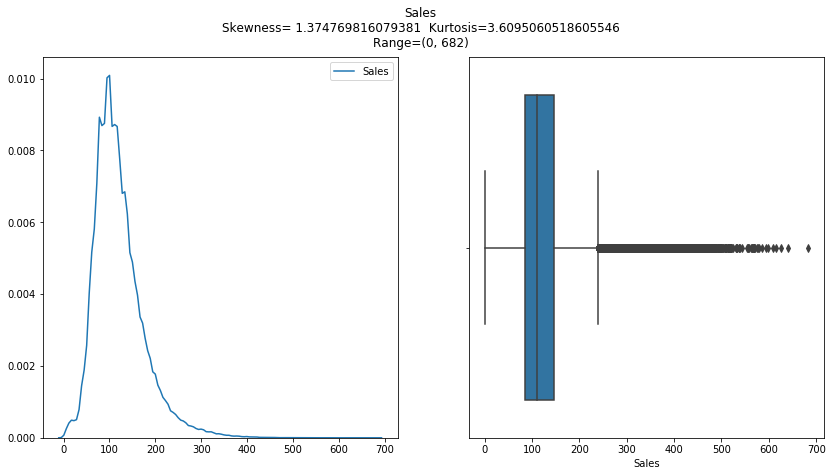

In [16]:
univ_numerical(train,"Sales")

**Slightly positively skewed and leptokurtic**

In [17]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

### ID-

In [18]:
train.ID

0              1
1              2
2              3
3              4
4              5
           ...  
512082    548023
512083    548024
512084    548025
512085    548026
512086    548027
Name: ID, Length: 512087, dtype: int64

In [19]:
list1=[]
for i,j in enumerate(train.ID):
    
    if(i+1==j):
        list1.append(False)
    else:
        list1.append(True)

In [20]:
train[list1]

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
882,943,1,2,Development,Course,0,1,1,12663,0.186,97
883,944,2,2,Development,Course,0,0,1,16905,0.186,122
884,945,3,2,Development,Course,0,0,1,15141,0.186,106
885,946,4,2,Development,Course,0,0,1,14490,0.186,109
886,947,5,2,Development,Course,0,0,1,11025,0.186,80
...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107


### Day_No

In [21]:
train["Day_No"]

0           1
1           2
2           3
3           4
4           5
         ... 
512082    878
512083    879
512084    880
512085    881
512086    882
Name: Day_No, Length: 512087, dtype: int64

In [22]:
882*600-train.shape[0]

17113

In [23]:
l1=train.groupby("Course_ID").nunique()["Day_No"]
l1
l1.unique()

array([882, 698, 881], dtype=int64)

In [24]:
l1=pd.DataFrame(l1)
l1[l1["Day_No"]==881]

,Day_No
Course_ID,
530,881


**Course_ID 530 has made sales for 881 days out of 882**

In [25]:
l1[l1["Day_No"]==698]

,Day_No
Course_ID,
9,698
14,698
29,698
33,698
41,698
...,...
560,698
570,698
576,698


**There are 93 course IDs which have made sales on 698 out of 882 days only.<br>
Why is this happening? It is possible that these courses were taken off the website on these days**

In [26]:
l2=[]
for i,j in enumerate(train[train.Course_ID==9]["Day_No"]):
    l2.append(i+1==j)

In [27]:
for i in l1[l1["Day_No"]==698].index:
    print(train[train.Course_ID==i][np.array(l2)].tail(1)["Day_No"],train[train.Course_ID==i][~np.array(l2)].head(1)["Day_No"])

7601    546
Name: Day_No, dtype: int64 7602    731
Name: Day_No, dtype: int64
11827    546
Name: Day_No, dtype: int64 11828    731
Name: Day_No, dtype: int64
24873    546
Name: Day_No, dtype: int64 24874    731
Name: Day_No, dtype: int64
28217    546
Name: Day_No, dtype: int64 28218    731
Name: Day_No, dtype: int64
35089    546
Name: Day_No, dtype: int64 35090    731
Name: Day_No, dtype: int64
36669    546
Name: Day_No, dtype: int64 36670    731
Name: Day_No, dtype: int64
50597    546
Name: Day_No, dtype: int64 50598    731
Name: Day_No, dtype: int64
53059    546
Name: Day_No, dtype: int64 53060    731
Name: Day_No, dtype: int64
56403    546
Name: Day_No, dtype: int64 56404    731
Name: Day_No, dtype: int64
64157    546
Name: Day_No, dtype: int64 64158    731
Name: Day_No, dtype: int64
66619    546
Name: Day_No, dtype: int64 66620    731
Name: Day_No, dtype: int64
72609    546
Name: Day_No, dtype: int64 72610    731
Name: Day_No, dtype: int64
74189    546
Name: Day_No, dtype: int64 74

**There is a jump from 546 to 731 where no sales for some 93 odd courses were made**

### Course_ID

In [28]:
train.Course_ID.nunique()

600

In [29]:
train["Course_ID"].unique().min(),train["Course_ID"].unique().max()

(1, 600)

**There are a total of 600 courses for which sales have been provided to us**

### Course_Domain

In [30]:
train["Course_Domain"].unique()

array(['Development', 'Software Marketing', 'Finance & Accounting',
       'Business'], dtype=object)

**So, we have courses of Four domains- Development, Software Marketing, Finance and Accounting, Business. Let us check the count of each course**

In [31]:
train.groupby("Course_ID")["Course_Domain"].unique().apply(lambda x:x[0]).value_counts()

Development             308
Software Marketing      198
Finance & Accounting     89
Business                  5
Name: Course_Domain, dtype: int64

**Around half of our courses are from Development**

### Course_Type

In [32]:
train["Course_Type"].unique()

array(['Course', 'Program', 'Degree'], dtype=object)

In [33]:
train.groupby("Course_ID")["Course_Type"].unique().apply(lambda x:x[0]).value_counts()

Course     310
Program    288
Degree       2
Name: Course_Type, dtype: int64

### Short_Promotion

In [34]:
train["Short_Promotion"].value_counts(normalize=True)

0    0.619756
1    0.380244
Name: Short_Promotion, dtype: float64

**Hypothesis- Short_Promotion is causing an increase in Sales**

### Public_Holiday

In [35]:
train["Public_Holiday"].value_counts(normalize=True)

0    0.968361
1    0.031639
Name: Public_Holiday, dtype: float64

In [36]:
train.groupby("Day_No")["Public_Holiday"].unique().apply(lambda x:x[0]).value_counts()

0    857
1     25
Name: Public_Holiday, dtype: int64

**25 days out of a total of 882 days are Public Holidays**

**Hypothesis- On Public Holidays, more sales are made**

### Long_Promotion

In [37]:
train["Long_Promotion"].value_counts(normalize=True)

0    0.511032
1    0.488968
Name: Long_Promotion, dtype: float64

In [38]:
train.groupby("Course_ID")["Long_Promotion"].unique().apply(lambda x:x[0]).value_counts()

1    301
0    299
Name: Long_Promotion, dtype: int64

In [39]:
train[train.Course_ID==5].Long_Promotion.unique()

array([0], dtype=int64)

**Half of the courses are on Promotion all the time, half of them are not.**

**Hypothesis- Courses which are being promoted all the time have higher sales**

### User_Traffic

In [40]:
train["User_Traffic"]

0         11004
1         13650
2         11655
3         12054
4          6804
          ...  
512082     8904
512083    10542
512084    13671
512085     8904
512086    11445
Name: User_Traffic, Length: 512087, dtype: int64

In [41]:
train[train.Day_No==1]["User_Traffic"]

0         11004
882       12663
1764      11256
2646      23625
3528      14490
          ...  
507677    11298
508559    10626
509441     8505
510323    14805
511205    69258
Name: User_Traffic, Length: 599, dtype: int64

**No. of people who land on Course Page are either the people who are using the course or for buying purposes.<br>**

Hypothesis-
1. User Traffic will be more on Public Holidays
2. Higher User Traffic will lead to higher Sales

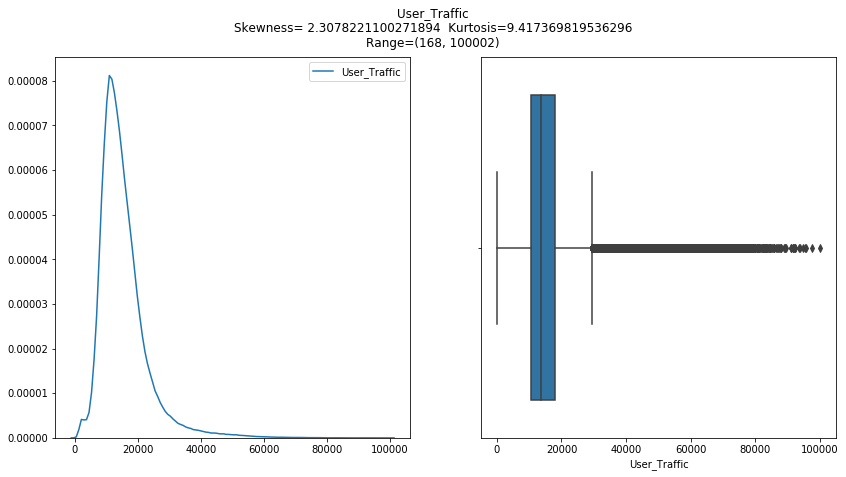

In [42]:
univ_numerical(train, "User_Traffic")

### Competition_Metric

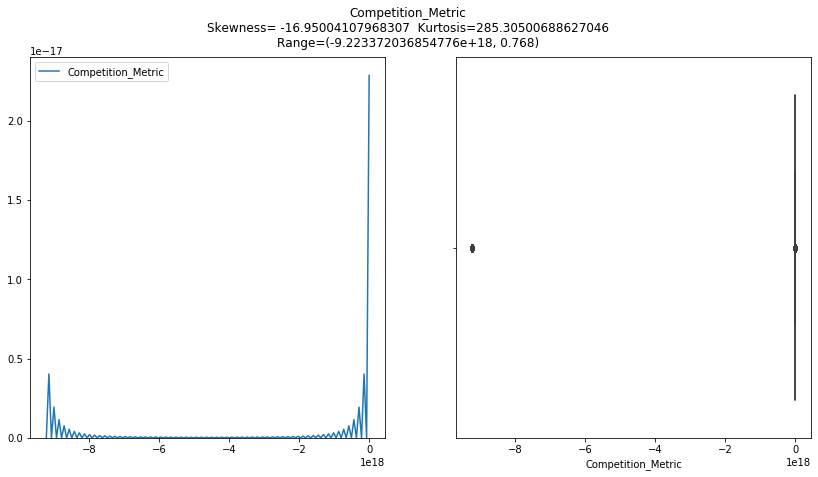

In [43]:
univ_numerical(train, "Competition_Metric")

In [44]:
a=train.groupby("Course_ID")["Competition_Metric"].unique().apply(lambda x: np.round(x[0],10))
a

Course_ID
1      0.007
2      0.186
3      0.316
4      0.099
5      0.027
       ...  
596    0.070
597    0.025
598    0.025
599    0.122
600    0.070
Name: Competition_Metric, Length: 600, dtype: float64

(0, 1)

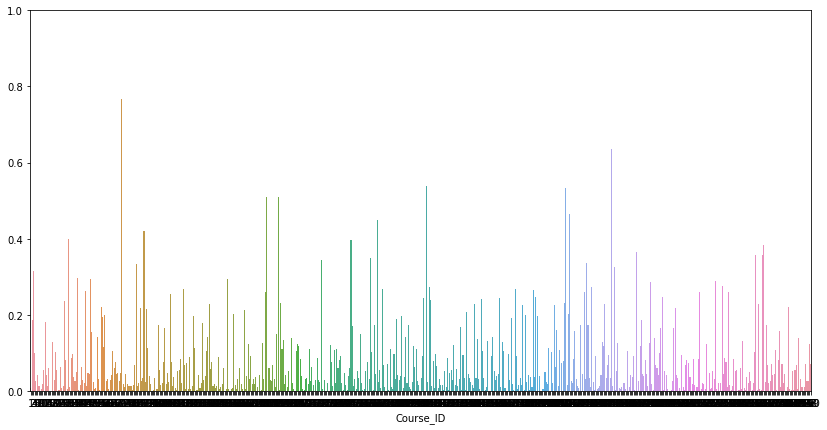

In [45]:
plt.figure(figsize=(14,7))
sns.barplot(x=a.index,y=a.values)
plt.ylim(0,1)

**Hypothesis- Courses with higher competition have lower sales**

### We have come up with some Hypothesis which we will now look into-
1. Short_Promotion is causing an increase in sales for Courses
2. On Public Holidays, there is more sale
3. Courses which are being Long_promoted have higher sales
4. User Traffic will be more on public Holidays
5. Higher User Traffic will lead to More Sales
6. Courses with higher competition metric have lower sales

### Hypothesis 1

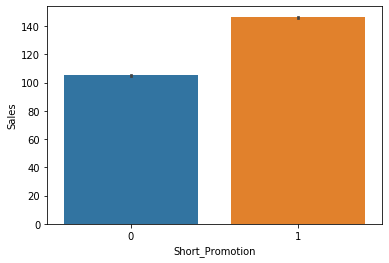

In [46]:
sns.barplot(data=train,x="Short_Promotion",y="Sales")

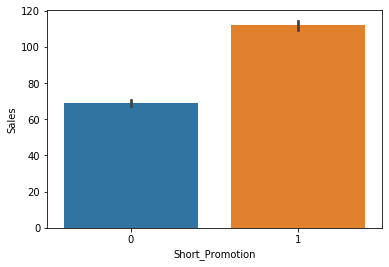

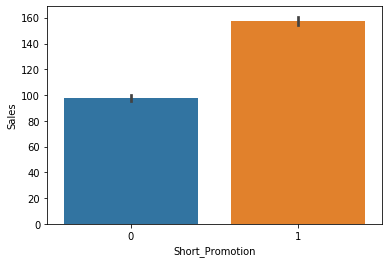

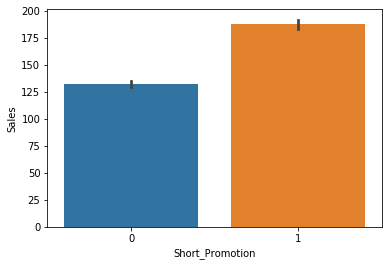

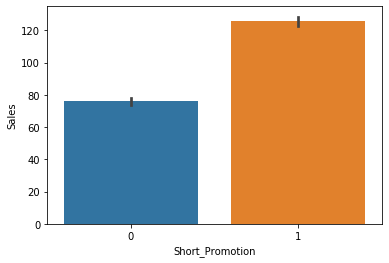

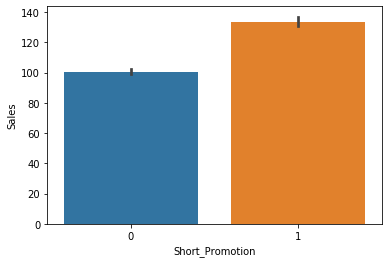

In [47]:
for i in range(1,6):
    sns.barplot(data=train[train.Course_ID==i],x="Short_Promotion",y="Sales")
    plt.show()

**Short Promotion is indeed causing an increase in Sales**

### Hypothesis 2

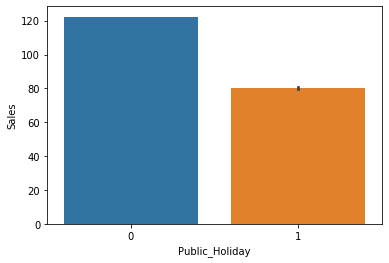

In [48]:
sns.barplot(data=train,x="Public_Holiday",y="Sales")

In [49]:
grp=pd.DataFrame(train.groupby(["Course_ID","Public_Holiday"])["Sales"].mean())
grp

Sales
Course_ID Public_Holiday            
1         0                86.504084
          1                42.320000
2         0               122.322014
          1                67.928571
3         0               155.114219
...                              ...
598       1               115.857143
599       0               117.242424
          1                84.333333
600       0               109.721963
          1                91.961538

[1200 rows x 1 columns]

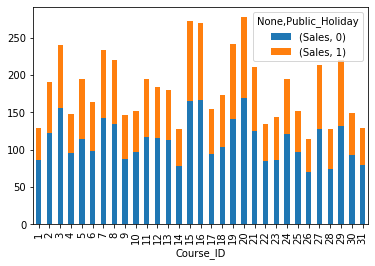

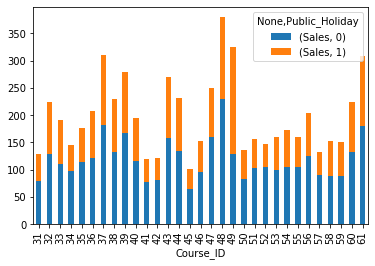

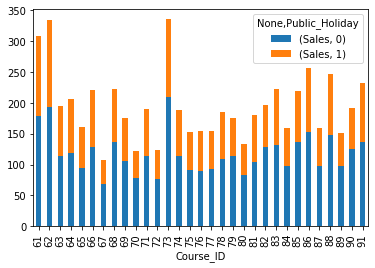

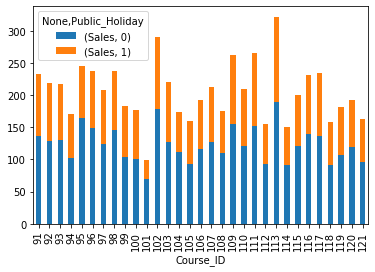

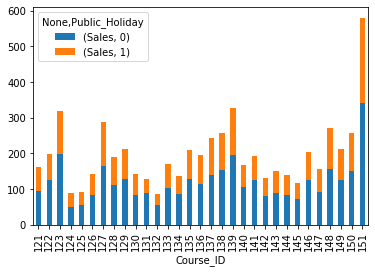

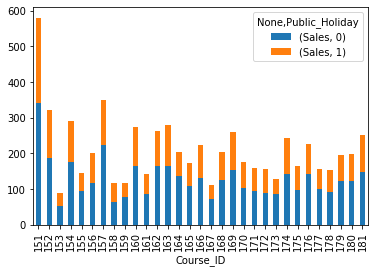

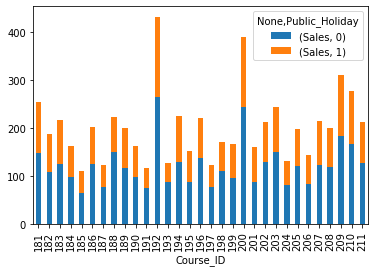

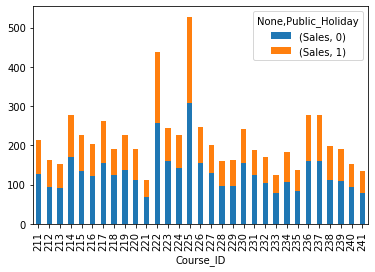

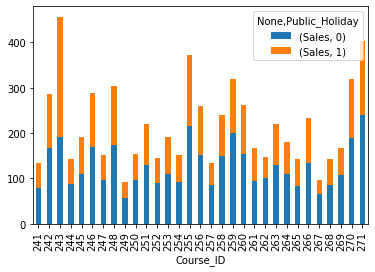

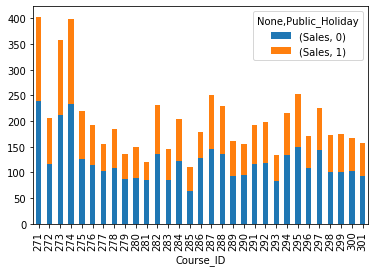

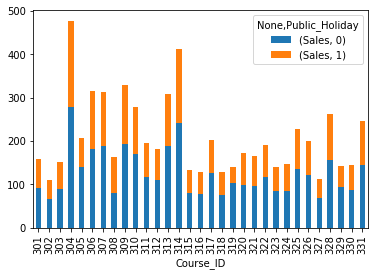

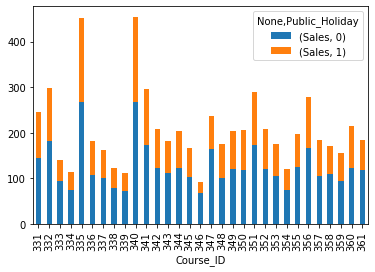

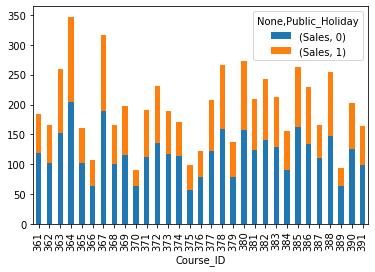

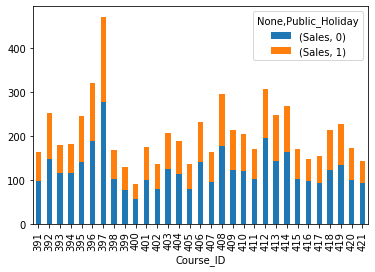

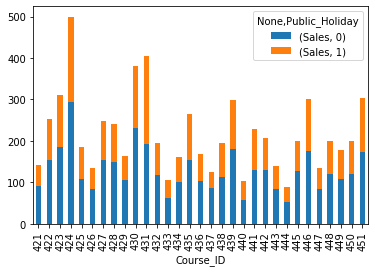

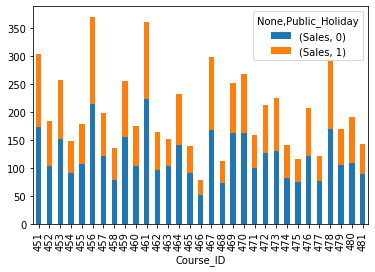

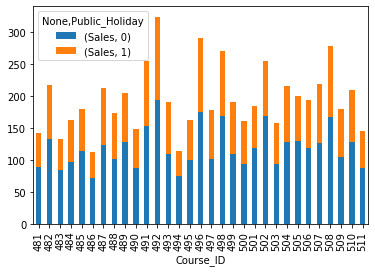

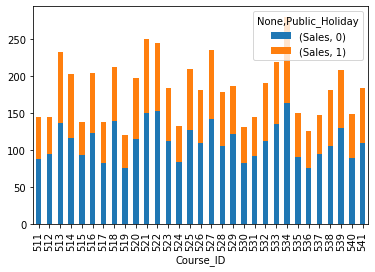

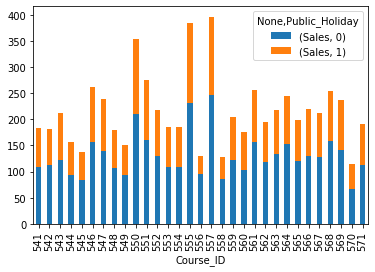

In [50]:
for i in range(1,571,30):
    grp.loc[i:i+30].unstack().plot(kind='bar',stacked=True)
    plt.show()

**There is decrease in Sales on Public Holidays but we assumed the other way round.**  

### Hypothesis 3

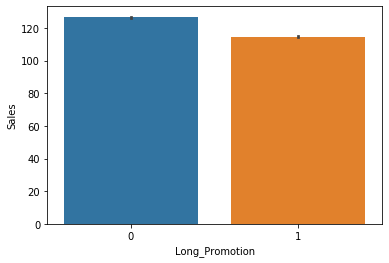

In [51]:
sns.barplot(data=train,x="Long_Promotion",y="Sales")

In [52]:
x=train.groupby(["Long_Promotion","Course_ID"]).mean()["Sales"].to_frame().reset_index()
x

,Long_Promotion,Course_ID,Sales
0,0,3,153.207483
1,0,4,94.812925
2,0,5,113.215420
3,0,6,96.774376
4,0,18,102.436508
...,...,...,...
595,1,593,82.810658
596,1,595,122.275072
597,1,596,84.924036
598,1,597,91.241497


**Long Promotion is not causing an increase in Sales**

### Hypothesis 4

In [53]:
train.groupby("Public_Holiday")["User_Traffic"].mean()

Public_Holiday
0    15526.375039
1    10745.152512
Name: User_Traffic, dtype: float64

**User Traffic is much less on a public holiday, this contrdicts our Hypothesis**

### Hypothesis 5

In [54]:
from scipy.stats import pearsonr

In [55]:
# correlation,_=pearsonr(train[train.Course_ID==5]["User_Traffic"],train[train.Course_ID==5]["Sales"])

In [56]:
correlation,_=pearsonr(train["User_Traffic"],train["Sales"])

In [57]:
correlation

0.8297414753800694

In [58]:
sum=0
for i in range(1,601):
    correl,_=pearsonr(train[train.Course_ID==i]["User_Traffic"],train[train.Course_ID==i]["Sales"])
    sum+=correl
    print(correl)

0.9184429565725598
0.9474412206321607
0.9380762095404369
0.9517906345925298
0.9640989054374156
0.9343166604623798
0.9400161152441172
0.9387959659062846
0.9587497535398373
0.9529195331278463
0.9380517477249786
0.9493185885988209
0.9438937917483171
0.9284441976921964
0.9681998992904679
0.9507146869888394
0.9467882681978479
0.9294102622355008
0.9509529162891255
0.9614761098099929
0.932440975215358
0.975131302123158
0.9519843905955505
0.9561595544807335
0.9589892623647818
0.9224168413078826
0.9625739782730818
0.9557042308678799
0.9510145253072042
0.9473497342357821
0.9617177632122907
0.9553010530943598
0.9517974412151644
0.9608914861499885
0.9609448520598691
0.9288142275703994
0.9443658835317377
0.9479776954826691
0.9540156247537248
0.9538382175744696
0.9646297494598576
0.9420708616568125
0.9578754263810858
0.9488125016092535
0.950599514926352
0.9530375978645824
0.9565111779980731
0.9400221405958864
0.9756380501424667
0.9574055846081547
0.9609239983005076
0.9583927668182953
0.9366366514384

0.9722425072324721
0.9555687804779969
0.9452313184429204
0.9669474651947055
0.941103661771296
0.9391895688740385
0.9460317605106192
0.956851023981676
0.9521608580904986
0.9405186912394601
0.9266956252064344
0.9677637112261058
0.9404942929327171
0.9691829518809195
0.9554239849597603
0.9615252252386337
0.9416256787133859
0.942538386998292
0.9486035636083809
0.9397869157891983
0.9479932992222126
0.9545623518725109
0.9546012701256488
0.947585525073696
0.9348400086566606
0.9319517753106186
0.9526323812222853
0.9494696575612162
0.9432246263272527
0.9578725120092655
0.9593649958882423
0.9655935216604532
0.9394185638054986
0.9574122182580096
0.9639700446711557
0.9478735691974558
0.942806956531231
0.9413436655843797
0.9390422821845861
0.9496642350709918
0.7785644339382367
0.9709773655376548
0.9085021127935629
0.9577965487039044
0.951677585045603
0.9612712280931944
0.9400576035508084
0.9513194127866491
0.9302694214614369
0.9521537430250246
0.9498400532727242
0.9569161906807248
0.9749427637828132

In [59]:
sum/600

0.9455744409019602

**User Traffic is highly correlated to the amount of sales made**

### Hypothesis 6

In [60]:
correlation,_=pearsonr(train["Competition_Metric"],train["Sales"])
correlation

0.014679921551452813

In [61]:
xa=train.groupby("Course_ID")[["Competition_Metric","Sales"]].mean()
xa

,Competition_Metric,Sales
Course_ID,,
1,0.007,85.251701
2,0.186,120.595238
3,0.316,153.207483
4,0.099,94.812925
5,0.027,113.215420
...,...,...
596,0.070,84.924036
597,0.025,91.241497
598,0.025,180.100907


In [62]:
xa.corr()

,Competition_Metric,Sales
Competition_Metric,1.000000,0.018859
Sales,0.018859,1.000000


**There is very little correlation with Competiton_Metric and Sales**

In [63]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [64]:
aa=pd.DataFrame(train.groupby("Course_ID").mean()["Sales"])
aa

,Sales
Course_ID,
1,85.251701
2,120.595238
3,153.207483
4,94.812925
5,113.215420
...,...
596,84.924036
597,91.241497
598,180.100907


In [65]:
train.groupby("Course_ID")["Course_Domain"].unique().apply(lambda x:x[0])

Course_ID
1               Development
2               Development
3               Development
4               Development
5               Development
               ...         
596             Development
597             Development
598    Finance & Accounting
599             Development
600      Software Marketing
Name: Course_Domain, Length: 600, dtype: object

In [66]:
aa["Course_Domain"]=list(train.groupby("Course_ID")["Course_Domain"].unique().apply(lambda x:x[0]))

In [67]:
aa.sort_values("Sales",ascending=False)

,Sales,Course_Domain
Course_ID,,
151,337.649660,Development
225,306.088435,Development
424,290.574830,Development
304,276.689342,Finance & Accounting
397,273.692744,Development
...,...,...
132,53.543084,Development
444,52.730159,Finance & Accounting
153,51.165533,Software Marketing


In [68]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [69]:
aa["No_Days_Sales"]=list(train.groupby("Course_ID")["Day_No"].nunique())

In [70]:
aa.sort_values("Sales",ascending=False).head(20)

,Sales,Course_Domain,No_Days_Sales
Course_ID,,,
151,337.649660,Development,882
225,306.088435,Development,882
424,290.574830,Development,882
304,276.689342,Finance & Accounting,882
397,273.692744,Development,882
335,265.321995,Development,882
340,265.020408,Finance & Accounting,882
192,260.778912,Development,882
222,254.246032,Development,882


In [71]:
aa.groupby(["Course_Domain","No_Days_Sales"]).mean()

Sales
Course_Domain        No_Days_Sales            
Business             882            186.592971
Development          698            107.069090
                     881             81.087401
                     882            121.697050
Finance & Accounting 698            101.142857
                     882            126.099538
Software Marketing   698            114.498225
                     882            119.650122

In [72]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [73]:
aa["Course_Type"]=list(train.groupby("Course_ID")["Course_Type"].unique().apply(lambda x: x[0]))
aa

,Sales,Course_Domain,No_Days_Sales,Course_Type
Course_ID,,,,
1,85.251701,Development,882,Course
2,120.595238,Development,882,Course
3,153.207483,Development,882,Program
4,94.812925,Development,882,Course
5,113.215420,Development,882,Program
...,...,...,...,...
596,84.924036,Development,882,Program
597,91.241497,Development,882,Course
598,180.100907,Finance & Accounting,882,Program


In [74]:
aa.groupby("Course_Type").mean()["Sales"]

Course_Type
Course     113.041589
Degree     184.061224
Program    128.058375
Name: Sales, dtype: float64

In [75]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

## INFERENCES from EDA-

1. Short_Promotion causes increase in Sales
2. Courses with Long_Promotions have lesser Sales infact
3. On Public Holidays, Sales are Less
4. Sales and User Traffic are highly correlated
5. Competition_Metric doesn't have any affect on Sales
6. Business Courses have much higher Sales than other domains
7. Degree Courses have much higher Sales than other courses/programmes

### Day_No

<Figure size 1008x504 with 0 Axes>

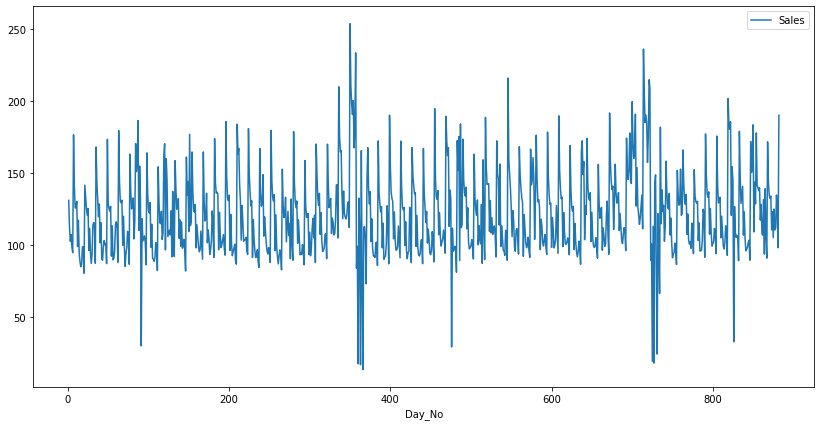

In [97]:
plt.figure(figsize=(14,7))
train.groupby("Day_No")["Sales"].mean().to_frame().plot(kind='line',figsize=(14,7))

In [98]:
new_train=train.copy()

In [99]:
new_train["Week_No"]=np.ceil(new_train["Day_No"]/7)
new_train

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Week_No
0,1,1,1,Development,Course,0,1,1,11004,0.007,81,1.0
1,2,2,1,Development,Course,0,0,1,13650,0.007,79,1.0
2,3,3,1,Development,Course,0,0,1,11655,0.007,75,1.0
3,4,4,1,Development,Course,0,0,1,12054,0.007,80,1.0
4,5,5,1,Development,Course,0,0,1,6804,0.007,41,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114,126.0
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145,126.0
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167,126.0
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107,126.0


In [100]:
new_train["Week_No"].describe()

count    512087.000000
mean         62.559565
std          36.576473
min           1.000000
25%          31.000000
50%          61.000000
75%          94.000000
max         126.000000
Name: Week_No, dtype: float64

In [101]:
new_train["Year_No"]=np.ceil(new_train["Week_No"]/52)
new_train["Week_No"]=new_train["Week_No"]%52
new_train

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Week_No,Year_No
0,1,1,1,Development,Course,0,1,1,11004,0.007,81,1.0,1.0
1,2,2,1,Development,Course,0,0,1,13650,0.007,79,1.0,1.0
2,3,3,1,Development,Course,0,0,1,11655,0.007,75,1.0,1.0
3,4,4,1,Development,Course,0,0,1,12054,0.007,80,1.0,1.0
4,5,5,1,Development,Course,0,0,1,6804,0.007,41,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114,22.0,3.0
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145,22.0,3.0
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167,22.0,3.0
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107,22.0,3.0


In [102]:
new_train

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Week_No,Year_No
0,1,1,1,Development,Course,0,1,1,11004,0.007,81,1.0,1.0
1,2,2,1,Development,Course,0,0,1,13650,0.007,79,1.0,1.0
2,3,3,1,Development,Course,0,0,1,11655,0.007,75,1.0,1.0
3,4,4,1,Development,Course,0,0,1,12054,0.007,80,1.0,1.0
4,5,5,1,Development,Course,0,0,1,6804,0.007,41,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512082,548023,878,600,Software Marketing,Program,0,0,1,8904,0.070,114,22.0,3.0
512083,548024,879,600,Software Marketing,Program,0,0,1,10542,0.070,145,22.0,3.0
512084,548025,880,600,Software Marketing,Program,0,0,1,13671,0.070,167,22.0,3.0
512085,548026,881,600,Software Marketing,Program,0,0,1,8904,0.070,107,22.0,3.0


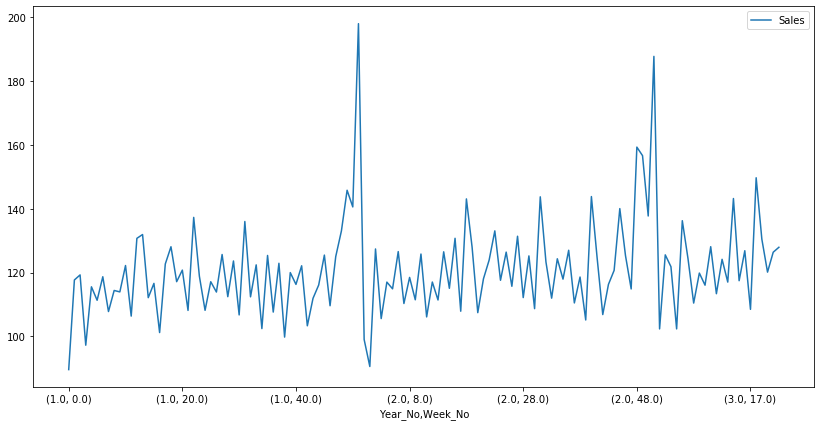

In [103]:
new_train.groupby(["Year_No","Week_No"])["Sales"].mean().to_frame().plot(kind='line',figsize=(14,7))
plt.show()